In [6]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def binary_relevance_ldc(Trn_data, Trn_labels, Tst_data):
    N_test = len(Tst_data) #Number of objects in testing data
    c_labels = len(Trn_labels[0, :]) #Number of labels
    assigned_labels = np.zeros((N_test, c_labels)) #Initialize array of assigned labels
    for i in range(c_labels):
        clf = LinearDiscriminantAnalysis()
        clf.fit(Trn_data, Trn_labels[:,i]) #Read column of each label
        assigned_labels[:,i] =  clf.predict(Tst_data)#Assign predicted labels of each column
    return assigned_labels.astype(int)

In [7]:

def calculate_distance(x_obj, trn_obj):
    distance = np.sum((x_obj - trn_obj)**2, axis=1)
    return np.sqrt(distance)

#Function returns value of membership counting vector
def get_memb_count_vector(Trn_labels, distances, n_neighbors):
    min_index = np.argsort(distances)
    memb_count_vector = np.sum(Trn_labels[min_index[:n_neighbors]], axis=0)
    memb_count_vector = memb_count_vector > 3
    return memb_count_vector.astype(int)

def adapted_knn(Trn_data, Trn_labels, Tst_data):

    n_neighbors = 10 #Ten nearest neighbours
    N_test_data = len(Tst_data)
    N_train_data = len(Trn_data) #Number of objects in training data
    c_labels = len(Trn_labels[0, :]) #Number of labels
    distances = np.zeros(N_train_data)
    assigned_labels = np.zeros((N_test_data, c_labels)) #Initialize array of assigned labels
    
    for i in range(N_test_data):
        distances = calculate_distance(Tst_data[i], Trn_data)
        assigned_labels[i] = get_memb_count_vector(Trn_labels, distances, n_neighbors)
    
    return assigned_labels.astype(int)

In [8]:

def calculate_hamming_loss(Tst_labels, Assigned_labels):
    hamming_loss = 0
    c_labels = len(Tst_labels[0]) #Number of labels
    N = len(Tst_labels) #Number of objects
    for i in range(len(Tst_labels)):
        hamming_loss = hamming_loss + np.sum(Tst_labels[i] != Assigned_labels[i])
    hamming_loss = hamming_loss/(N*c_labels)
    return round(hamming_loss,4)

Df_trn_data = pd.read_csv('csv_result-birds-train.csv')
Df_trn_data = Df_trn_data.drop('id', axis=1) #Drop first column
Trn_data = Df_trn_data.to_numpy()
Trn_labels = Trn_data[:, -19:].astype(int)
Trn_data = Trn_data[:, :-19]

Df_tst_data = pd.read_csv('csv_result-birds-test.csv')
Df_tst_data = Df_tst_data.drop('id', axis=1)
Tst_data = Df_tst_data.to_numpy()
Tst_labels = Tst_data[:, -19:].astype(int)
Tst_data = Tst_data[:, :-19]

assigned_labels = binary_relevance_ldc(Trn_data, Trn_labels, Tst_data)

#Calculate hamming loss of Binary Relevance LDC
hamming_loss = calculate_hamming_loss(Tst_labels, assigned_labels)
print('\nBinary Relevance LDC - Hamming loss = %.2f percent ' % (hamming_loss*100))

assigned_labels = adapted_knn(Trn_data, Trn_labels, Tst_data)

#Calculate hamming loss of Adapted knn
hamming_loss = calculate_hamming_loss(Tst_labels, assigned_labels)
print('\nAdapted knn - Hamming losssss = %.2f percent ' % (hamming_loss*100))


Binary Relevance LDC - Hamming loss = 19.62 percent 

Adapted knn - Hamming losssss = 6.13 percent 


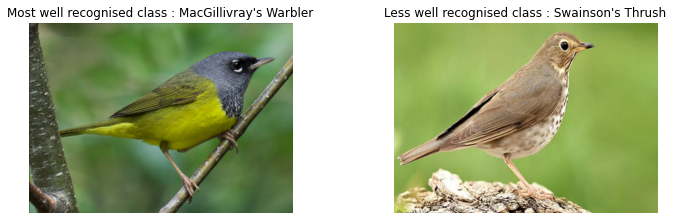

In [9]:

def calculate_accuracy_vector(Tst_labels, Assigned_labels):
    c_labels = len(Tst_labels[0]) #Number of labels
    accuracy_vector = np.zeros(c_labels)
    for i in range(c_labels):
        accuracy_vector[i] = np.mean(Tst_labels[:,i]==Assigned_labels[:,i])
    return accuracy_vector

def show_images(most_acc_class, less_acc_class, class_labels):
    fig, ax = plt.subplot_mosaic([
    ['MacGillivraysWarbler', 'SwainsonThrush']
    ], figsize=(12, 3.5))
    
    most_recog = plt.imread('MacGillivraysWarbler.png')
    ax['MacGillivraysWarbler'].imshow(most_recog)
    ax['MacGillivraysWarbler'].axis('off')
    ax['MacGillivraysWarbler'].set_title('Most well recognised class : ' + class_labels[most_acc_class])  
    
    less_recog = plt.imread('SwainsonThrush.jpeg')
    ax['SwainsonThrush'].imshow(less_recog)
    ax['SwainsonThrush'].axis('off')
    ax['SwainsonThrush'].set_title('Less well recognised class : ' + class_labels[less_acc_class])
    
accuracy_vector = calculate_accuracy_vector(Tst_labels, assigned_labels) #Calculate accuracy vector for adapted knn

class_labels = [' Brown Creeper', 'Pacific Wren', 'Pacific-slope Flycatcher', 'Red-breasted Nuthatch', 'Dark-eyed Junco', 
                'Olive-sided Flycatcher', 'Hermit Thrush', 'Chestnut-backed Chickadee', ' Varied Thrush', 'Hermit Warbler', 
                'Swainson\'s Thrush', 'Hammond\'s Flycatcher', 'Western Tanager', 'Black-headed Grosbeak', 'Golden Crowned Kinglet', 
                'Warbling Vireo', 'MacGillivray\'s Warbler', 'Stellar\'s Jay', 'Common Nighthawk']

most_acc_class = np.argmax(accuracy_vector)
less_acc_class = np.argmin(accuracy_vector)
show_images(most_acc_class, less_acc_class, class_labels)